## Nurse Availability Levels with different Utility Functions
# Cases for Number of nurses

Task:

    Evaluate Shift Coverage, Agent Satisfaction and Agent Productivity over changes in number of nurse available

In [1]:
import abm_scheduling
from abm_scheduling import Schedule as Schedule
from abm_scheduling import Nurse as Nurse

In [2]:
import time
from datetime import datetime

import abm_scheduling.Log
from abm_scheduling.Log import Log as Log

import matplotlib.pylab as plt
%matplotlib inline

log = Log()

### Shift coverage on number of nurses

In [3]:
p_to_accept_negative_change = .001
degree_of_agent_availability = 0.7
min_number_of_runs_with_shift_coverage_1 = 3
works_weekends = True
num_nurses_per_shift = 5

In [4]:
nurses = []
schedule = Schedule(num_nurses_needed=num_nurses_per_shift, is_random=True)
model = abm_scheduling.NSP_AB_Model()

In [5]:
# run model with default utility function
num_nurses_D_UF = 0
run_results_SC_over_NN_default_UF = []

number_of_runs_with_shift_coverage_1 = 0

start_time = datetime.today()
print(str(start_time.strftime("%d-%m-%y %H %M %S")))

while number_of_runs_with_shift_coverage_1 < min_number_of_runs_with_shift_coverage_1:
    nurse = Nurse(id_name=num_nurses_D_UF)
    nurse.generate_shift_preferences(degree_of_agent_availability=0.7, works_weekends=True)
    nurses.append(nurse)
    num_nurses_D_UF += 1
    
    results = model.run(schedule_org=schedule,
                       nurses_org=nurses,
                       p_to_accept_negative_change=p_to_accept_negative_change,
                       utility_function_parameters=None,
                       print_stats=False)
    run_results_SC_over_NN_default_UF.append(results)

    if results.shift_coverage >= 1:
        number_of_runs_with_shift_coverage_1 += 1


end_time = datetime.today()
log.print_elapsed_time(start_time,end_time)

17-06-19 13 03 01


NameError: name 'print_elapsed_time' is not defined

In [6]:
end_time = datetime.today()
log.print_elapsed_time(start_time,end_time)

Start:  2019-06-17 13:03:01.780902
End:  2019-06-17 13:12:23.411366
Elapsed time: 00:09:21


In [7]:
# run model with agetn satisfaction utility function
utility_function_parameters = abm_scheduling.Utility_Function_Parameters()
utility_function_parameters.utility_function = 'agent_satisfaction'
num_nurses_AS_UF = 0
run_results_SC_over_NN_AS_UF = []
nurses = []

number_of_runs_with_shift_coverage_1 = 0

start_time = datetime.today()
print(str(start_time.strftime("%d-%m-%y %H %M %S")))

while number_of_runs_with_shift_coverage_1 < min_number_of_runs_with_shift_coverage_1:
    nurse = Nurse(id_name=num_nurses_AS_UF)
    nurse.generate_shift_preferences(degree_of_agent_availability=0.7, works_weekends=True)
    nurses.append(nurse)
    num_nurses_AS_UF += 1
    
    results = model.run(schedule_org=schedule,
                       nurses_org=nurses,
                       p_to_accept_negative_change=p_to_accept_negative_change,
                       utility_function_parameters = utility_function_parameters,
                       print_stats=False)
    run_results_SC_over_NN_AS_UF.append(results)

    if results.shift_coverage >= 1:
        number_of_runs_with_shift_coverage_1 += 1

end_time = datetime.today()
log.print_elapsed_time(start_time,end_time)

17-06-19 13 13 51
Start:  2019-06-17 13:13:51.029620
End:  2019-06-17 13:41:16.381883
Elapsed time: 00:27:25


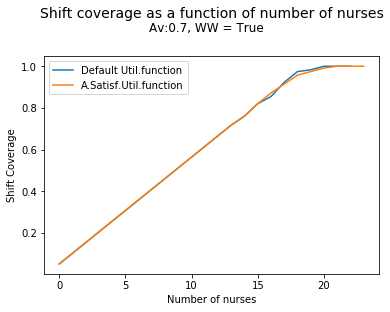

In [9]:
plt.figure()
plt.plot(range(num_nurses_D_UF), [r.shift_coverage for r in run_results_SC_over_NN_default_UF], label="Default Util.function")
plt.plot(range(num_nurses_AS_UF), [r.shift_coverage for r in run_results_SC_over_NN_AS_UF], label="A.Satisf.Util.function")
plt.title(f'Shift coverage as a function of number of nurses', y=1.15, fontsize=14)
plt.suptitle(f'Av:0.7, WW = True', y=1.0)
plt.xlabel("Number of nurses")
plt.ylabel("Shift Coverage")
plt.legend()
plt.show()

In [10]:
print(run_results_SC_over_NN_default_UF[19].shift_coverage)
print(run_results_SC_over_NN_default_UF[20].shift_coverage)
print(run_results_SC_over_NN_default_UF[21].shift_coverage)

print(run_results_SC_over_NN_AS_UF[19].shift_coverage)
print(run_results_SC_over_NN_AS_UF[20].shift_coverage)
print(run_results_SC_over_NN_AS_UF[21].shift_coverage)

0.9829059829059829
1.0
1.0
0.9743589743589743
0.9914529914529915
1.0


### Agent satisfaction over number of nurses

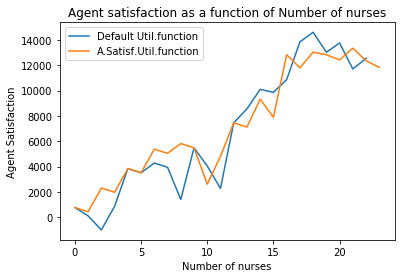

In [12]:
plt.figure()
plt.plot(range(num_nurses_D_UF), [r.total_agent_satisfaction for r in run_results_SC_over_NN_default_UF], label="Default Util.function")
plt.plot(range(num_nurses_AS_UF), [r.total_agent_satisfaction for r in run_results_SC_over_NN_AS_UF], label="A.Satisf.Util.function")
plt.title(f'Agent satisfaction as a function of Number of nurses')
plt.xlabel("Number of nurses")
plt.ylabel("Agent Satisfaction")
plt.legend()
plt.show()

### Agent productivity over number of nurses

In [14]:
# get aggregated productivity results
def get_aggr_prod_results(run_results, detail_productivity_over_nr_nurses,avg_productivity_over_nr_nurses,nr_nurses_underbooked, nr_nurses_overbooked):
    for r in run_results:
        data = []
        for nurse in r.nurses:
            assigned_shifts = len(nurse.shifts)
            data.append(assigned_shifts/ nurse.minimum_shifts)
            nr_nurses_underbooked += 1*(assigned_shifts<nurse.minimum_shifts) 
            nr_nurses_overbooked += 1*(assigned_shifts>nurse.maximum_shifts)
        detail_productivity_over_nr_nurses.append(data)
        avg_productivity_over_nr_nurses.append(sum(data)/len(data))

# for default utility function
detail_productivity_over_nr_nurses_DUF = []
avg_productivity_over_nr_nurses_DUF = []
nr_nurses_underbooked_DUF = 0 
nr_nurses_overbooked_DUF = 0

get_aggr_prod_results(run_results=run_results_SC_over_NN_default_UF, 
                      detail_productivity_over_nr_nurses=detail_productivity_over_nr_nurses_DUF,
                      avg_productivity_over_nr_nurses=avg_productivity_over_nr_nurses_DUF,
                     nr_nurses_underbooked=nr_nurses_underbooked_DUF,
                     nr_nurses_overbooked=nr_nurses_overbooked_DUF)

# for agent satisfaction utility function
detail_productivity_over_nr_nurses_ASUF = []
avg_productivity_over_nr_nurses_ASUF = []
nr_nurses_underbooked_ASUF = 0 
nr_nurses_overbooked_ASUF = 0

get_aggr_prod_results(run_results=run_results_SC_over_NN_AS_UF, 
                      detail_productivity_over_nr_nurses=detail_productivity_over_nr_nurses_ASUF,
                      avg_productivity_over_nr_nurses=avg_productivity_over_nr_nurses_ASUF,
                      nr_nurses_underbooked=nr_nurses_underbooked_ASUF,
                      nr_nurses_overbooked=nr_nurses_overbooked_ASUF)  

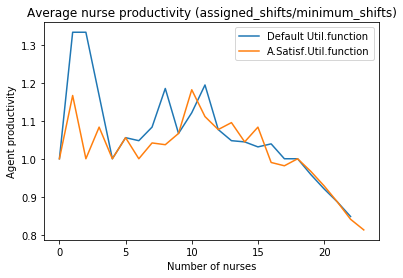

In [16]:
plt.figure()
plt.plot(range(num_nurses_D_UF), avg_productivity_over_nr_nurses_DUF, label="Default Util.function")
plt.plot(range(num_nurses_AS_UF), avg_productivity_over_nr_nurses_ASUF, label="A.Satisf.Util.function")
plt.title(f'Average nurse productivity (assigned_shifts/minimum_shifts)')
plt.xlabel("Number of nurses")
plt.ylabel("Agent productivity")
plt.legend()
plt.show()

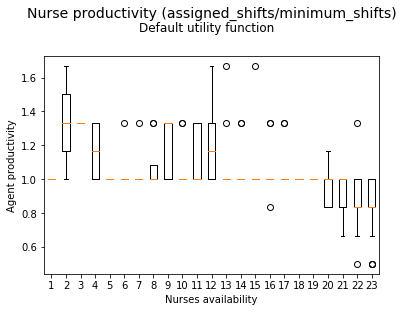

In [19]:
plt.figure()
w = plt.boxplot(detail_productivity_over_nr_nurses_DUF)
plt.title(f'Nurse productivity (assigned_shifts/minimum_shifts)', y=1.15, fontsize=14)
plt.suptitle(f'Default utility function', y=1.0)
plt.xlabel("Nurses availability")
plt.ylabel("Agent productivity")
plt.show()

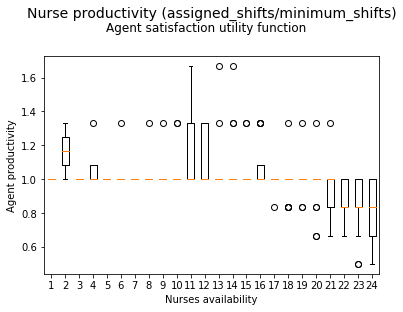

In [20]:
plt.figure()
w = plt.boxplot(detail_productivity_over_nr_nurses_ASUF)
plt.title(f'Nurse productivity (assigned_shifts/minimum_shifts)', y=1.15, fontsize=14)
plt.suptitle(f'Agent satisfaction utility function', y=1.0)
plt.xlabel("Nurses availability")
plt.ylabel("Agent productivity")
plt.show()